In [1]:
#Imports
import tensorflow as tf
import os
import numpy as np
import shutil
import zipfile
import matplotlib.pyplot as plt

In [2]:
#Imports for TensorFlow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers


In [3]:
import os
import shutil
import numpy as np

# Define the directories
base_dir = os.getcwd()
dataset_dir = os.path.join(base_dir, 'Dataset')
dataset_split_dir = os.path.join(base_dir, 'dataset_split')

# Create the split directories if they don't exist
os.makedirs(dataset_split_dir, exist_ok=True)
train_dir = os.path.join(dataset_split_dir, 'train')
valid_dir = os.path.join(dataset_split_dir, 'valid')
test_dir = os.path.join(dataset_split_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get the list of all classes
classes = os.listdir(dataset_dir)

# For each class, split the files into train/valid/test
for class_name in classes:
    # Create directories for this class in train/valid/test
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(valid_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Get a list of all files for this class
    files = os.listdir(os.path.join(dataset_dir, class_name))
    # Shuffle the files
    np.random.shuffle(files)

    # Split the files
    train_files = files[:int(len(files)*0.8)]
    valid_files = files[int(len(files)*0.8):int(len(files)*0.95)]
    test_files = files[int(len(files)*0.95):]

    # Copy the files to the right directories
    for file in train_files:
        shutil.copy(os.path.join(dataset_dir, class_name, file), os.path.join(train_dir, class_name, file))
    for file in valid_files:
        shutil.copy(os.path.join(dataset_dir, class_name, file), os.path.join(valid_dir, class_name, file))
    for file in test_files:
        shutil.copy(os.path.join(dataset_dir, class_name, file), os.path.join(test_dir, class_name, file))

In [3]:
base_dir = os.getcwd() #Defining the base directory
dataset_split_dir = os.path.join(base_dir, 'dataset_split')
train_dir = os.path.join(dataset_split_dir, 'train')
valid_dir = os.path.join(dataset_split_dir, 'valid')
test_dir = os.path.join(dataset_split_dir, 'test')

In [4]:
#Train, Validation and test Data
img_height, img_width = 64, 64
batch_size = 100
Train = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
Valid = ImageDataGenerator( rescale = 1.0/255. )
Test = ImageDataGenerator( rescale = 1.0/255. )
train_data = Train.flow_from_directory(train_dir, 
                                         target_size = (img_height, img_width), 
                                         batch_size = batch_size,
                                         class_mode = 'categorical'
                                         )
valid_data = Valid.flow_from_directory(valid_dir,
                                        target_size = (img_height, img_width),
                                        batch_size = batch_size,
                                        class_mode = 'categorical'
                                        )
test_data = Test.flow_from_directory(test_dir, 
                                            target_size = (img_height, img_width),
                                            batch_size = batch_size,
                                            class_mode = 'categorical'
                                            )

Found 3200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [5]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Conv2D(32, 3, activation="relu", input_shape=(150, 150, 3)),
     tf.keras.layers.MaxPooling2D(2),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(2),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(4, activation="softmax")
    ]
)


In [8]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(128, 16, activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(64, 8, activation='relu'),
    tf.keras.layers.MaxPooling2D(2), 
    tf.keras.layers.Conv2D(32, 4, activation='relu'), 
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [5]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), input_shape=(64, 64, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      Dropout(0.5, seed=123),
      tf.keras.layers.Dense(512, activation='relu'),
      Dropout(0.6, seed=123),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [6]:

model.compile(optimizer="Adam",
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

In [8]:
history = model.fit(
    train_data,
    validation_data = valid_data,
    epochs = 30 #15
)

Epoch 1/30
32/32 [==============================] - 19s 597ms/step - loss: 1.2346 - accuracy: 0.4066 - val_loss: 0.7341 - val_accuracy: 0.7217
Epoch 2/30
32/32 [==============================] - 18s 571ms/step - loss: 0.8164 - accuracy: 0.6694 - val_loss: 0.6444 - val_accuracy: 0.7233
Epoch 3/30
32/32 [==============================] - 18s 571ms/step - loss: 0.6483 - accuracy: 0.7425 - val_loss: 0.5423 - val_accuracy: 0.8117
Epoch 4/30
32/32 [==============================] - 18s 571ms/step - loss: 0.5665 - accuracy: 0.7772 - val_loss: 0.4629 - val_accuracy: 0.8367
Epoch 5/30
32/32 [==============================] - 18s 583ms/step - loss: 0.5091 - accuracy: 0.8019 - val_loss: 0.4271 - val_accuracy: 0.8567
Epoch 6/30
32/32 [==============================] - 18s 571ms/step - loss: 0.4543 - accuracy: 0.8350 - val_loss: 0.4015 - val_accuracy: 0.8533
Epoch 7/30
32/32 [==============================] - 18s 567ms/step - loss: 0.4227 - accuracy: 0.8356 - val_loss: 0.3335 - val_accuracy: 0.8933

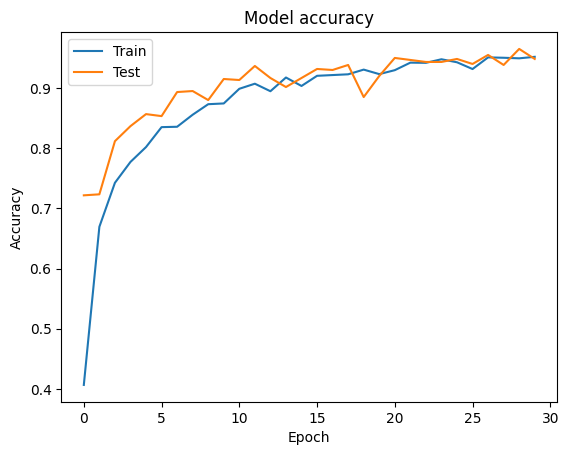

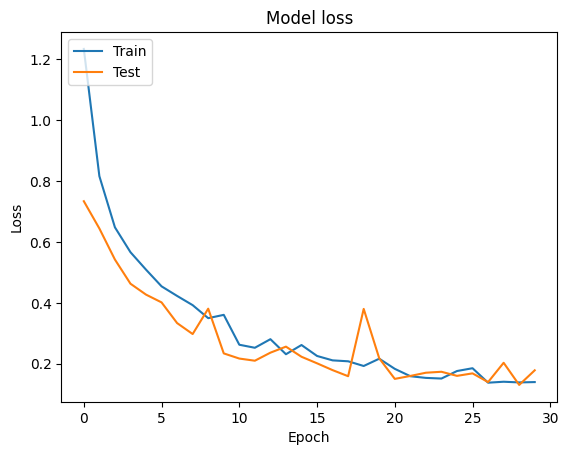

In [9]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [9]:
print(tf.test.is_gpu_available )



<function is_gpu_available at 0x00000168451A57E0>


In [10]:
model.evaluate(test_data)


2/2 [==============================] - 1s 170ms/step - loss: 0.1864 - accuracy: 0.9500


[0.18637515604496002, 0.949999988079071]

In [11]:
model.save('FruitClassifier_64x64_Dropout_30Epochs_Train9519%_Val9483%_Test9500%.h5')

In [3]:
#Testing the model

Classes = ['Apple', 'Banana', 'Lemon', 'Orange']

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import tkinter as tk
from tkinter import filedialog

def test_model(model):
    root = tk.Tk()
    root.withdraw()
    image_path = filedialog.askopenfilename()

    # Load the image
    img = load_img(image_path, target_size=(64, 64))

    # Convert the image to a numpy array
    img_array = img_to_array(img)

    # Add an extra dimension to the array
    img_array_expanded = np.expand_dims(img_array, axis=0)

    # Normalize the data
    img_array_expanded /= 255.

    # Use the model to make a prediction
    prediction = model.predict(img_array_expanded)

     # Print the prediction
    print(prediction)

    # Get the class with the highest probability
    predicted_class = np.argmax(prediction)

    confidence_level = np.max(prediction)


    return predicted_class, confidence_level

model = tf.keras.models.load_model('FruitClassifier_64x64_Dropout_30Epochs_Train9519%_Val9483%_Test9500%.h5')
predicted_class, confidence_level = test_model(model)
print(predicted_class, confidence_level)
print("Prediction: ", Classes[predicted_class])
print("Confidence level: ", confidence_level*100, "%")

ValueError: The channel dimension of the inputs should be defined. The input_shape received is (None, None, None, None), where axis -1 (0-based) is the channel dimension, which found to be `None`.